#Text-to-image

In [ ]:
!pip install diffusers transformers gradio accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 37.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 31.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 56.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [ ]:
from diffusers import StableDiffusionPipeline
import torch
import matplotlib.pyplot as plt

In [ ]:
!pip show torch

Name: torch
Version: 2.6.0+cu124
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3-Clause
Location: /usr/local/lib/python3.11/dist-packages
Requires: filelock, fsspec, jinja2, networkx, nvidia-cublas-cu12, nvidia-cuda-cupti-cu12, nvidia-cuda-nvrtc-cu12, nvidia-cuda-runtime-cu12, nvidia-cudnn-cu12, nvidia-cufft-cu12, nvidia-curand-cu12, nvidia-cusolver-cu12, nvidia-cusparse-cu12, nvidia-cusparselt-cu12, nvidia-nccl-cu12, nvidia-nvjitlink-cu12, nvidia-nvtx-cu12, sympy, triton, typing-extensions
Required-by: accelerate, fastai, peft, sentence-transformers, timm, torchaudio, torchdata, torchvision


In [ ]:
model_id = "CompVis/stable-diffusion-v1-4"
model_id2="Skywork/Skywork-UniPic-1.5B"
pipe = StableDiffusionPipeline.from_pretrained(model_id2, torch_dtype=torch.float16,use_safetensors=True)
pipe = pipe.to("cuda")

EntryNotFoundError: 404 Client Error. (Request ID: Root=1-6890f0a5-2f031eab3ed7de40719756b8;c42d6707-84d2-45c9-8dba-e2cf83dda62d)

Entry Not Found for url: https://huggingface.co/Skywork/Skywork-UniPic-1.5B/resolve/main/model_index.json.

In [ ]:
prompt="""grainy like iphone 10 like image, a helplsess women asking for water,traveling in desert, dynamic pose, thirsty,broken ,long hair arab women, torn kawaii shirt and baggy jeans"""

In [ ]:
image=pipe(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

[PROMPT] :  grainy like iphone 10 like image, a helplsess women asking for water,traveling in desert, dynamic pose, thirsty,broken ,long hair arab women, torn kawaii shirt and baggy jeans


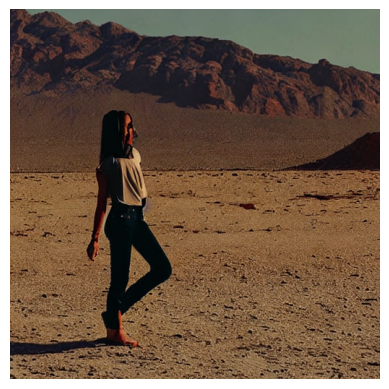

In [ ]:
print("[PROMPT] : ",prompt)
plt.imshow(image);
plt.axis('off');


In [ ]:
prompt2="""grainy image, a helplsess couples asking for help,
traveling in Amazon Rainforest, dynamic pose, muddy,broken ,long hair asain ,
torn madmaxx shirt and baggy shorts"""
image=pipe(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

[PROMPT] :  grainy image, a helplsess couples asking for help,
traveling in Amazon Rainforest, dynamic pose, muddy,broken ,long hair asain , 
torn madmaxx shirt and baggy shorts


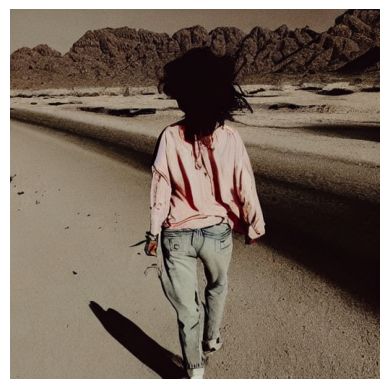

In [ ]:
print("[PROMPT] : ",prompt2)
plt.imshow(image);
plt.axis('off');


#Working with Stable Diffusion parameters



*   negative prompting
*   num_inference_steps
* height
* weight
* num_images_per_prompt



In [ ]:
def generate_image(pipe,prompt, params):
  img=pipe(prompt,**params).images
  num_images=len(img)
  if num_images>1:
    fig,ax=plt.subplots(nrows=1,ncols=num_images)
    for i in range(num_images):
      ax[i].imshow(img[i]);
      ax[i].axis('off');
  else:
    plt.imshow(img[0]);
    plt.axis('off');

In [ ]:
prompt3=""" a old couples asking for help,
traveling in America , dynamic pose,new york ,long hair  ,
torn Trump shirt and baggy shorts"""
param={}

  0%|          | 0/50 [00:00<?, ?it/s]

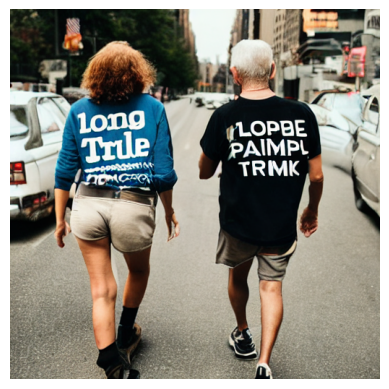

In [ ]:
generate_image(pipe,prompt3,param)

  0%|          | 0/100 [00:00<?, ?it/s]

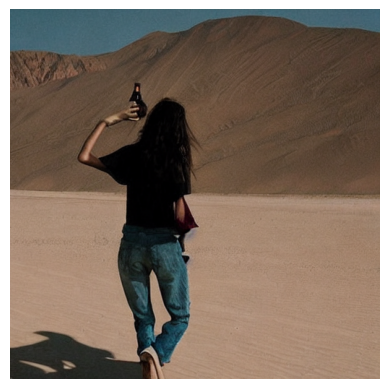

In [ ]:
#num inference steps
param={'num_inference_steps':100}
generate_image(pipe,prompt,param)

  0%|          | 0/50 [00:00<?, ?it/s]

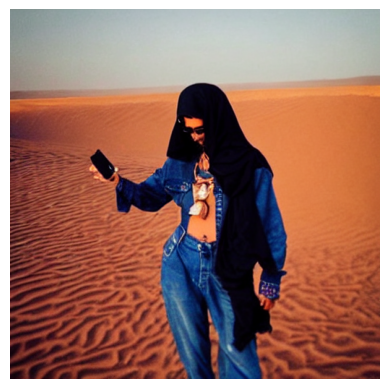

In [ ]:
#height width parameters
param={'height':512,'width':512}
generate_image(pipe,prompt,param)

  0%|          | 0/100 [00:00<?, ?it/s]

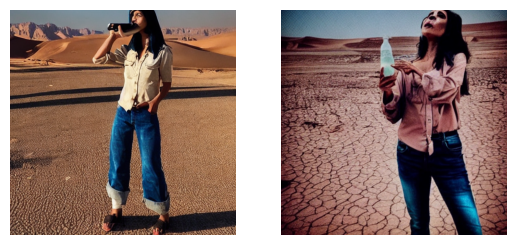

In [ ]:
#num_images_per_prompt
param={'num_inference_steps': 100, 'num_images_per_prompt':2}
generate_image(pipe,prompt,param)

  0%|          | 0/100 [00:00<?, ?it/s]

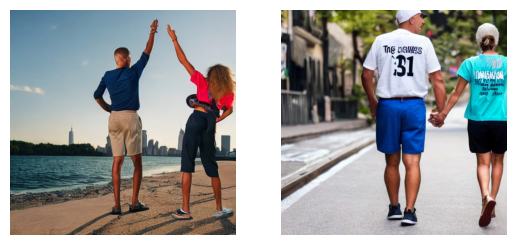

In [ ]:
#negative _promt
param={'num_inference_steps': 100, 'num_images_per_prompt':2,'negative_prompt':'lugly old distorted'}
generate_image(pipe,prompt3,param)